In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from udukoresho import (
    setup_matplotlib_for_latex, 
)
import math
from skopt.space import Space
from skopt.sampler import Lhs
from skopt.sampler import Grid
from typing import List, Tuple, Callable
import numpy as np

In [3]:
%matplotlib inline
setup_matplotlib_for_latex(
    mpl,
)
df = pd.DataFrame(columns=['duration', 'bandwidth', 'size', 'method'])

/Library/TeX/texbin/kpsewhich


# Experimental Search Space

LHS with Maximin. [source](https://scikit-optimize.github.io/stable/auto_examples/sampler/initial-sampling-method.html#comparing-initial-sampling-methods)

In [4]:
def lhs_callback(space: Space, nb_points) -> list:
    lhs = Lhs(criterion="maximin", iterations=1000)
    return lhs.generate(space.dimensions, nb_points, random_state=42)
    
def grid_callback(space: Space, nb_points) -> list:
    grid = Grid(border="include", use_full_layout=False)
    return grid.generate(space.dimensions, nb_points)

def plot_search_space(
    fig, ax, variables_ranges: List[Tuple[int]], nb_points: int, 
    labels: List[str], df: pd.DataFrame, insert_df_callback: Callable[[pd.DataFrame, Tuple[float]], pd.DataFrame],
    units: List[str], generate_points_cb: Callable[[Space, int], list]
):
    space = Space(
        variables_ranges,
    )
    x = generate_points_cb(space, nb_points)
    for i in range(nb_points):
        df = insert_df_callback(df, x[i])
    x_label, y_label, z_label = labels[0], labels[1], labels[2]
    norm = plt.Normalize(df[z_label].min(), df[z_label].max())
    p = "viridis"
    sns.scatterplot(
        data=df, 
        x=x_label, y=y_label, hue=z_label, 
        palette=p, legend=False, ax=ax, alpha=0.85, zorder=2
    )
    sm = plt.cm.ScalarMappable(cmap=p, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, label=f"{z_label} [{units[2]}]")
    cbar.ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(unit=''))
    ax.set_xlabel(f"{x_label} [{units[0]}]")
    ax.set_ylabel(f"{y_label} [{units[1]}]")
    ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(unit=''))
    ax.xaxis.set_major_formatter(mpl.ticker.EngFormatter(unit=''))
    ax.grid()
    return df

/var/folders/ps/jk9b4v4975gbhdfjyh9kkx780000gp/T/ipykernel_47570/1504540699.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  insert_df_callback=lambda df, x: pd.concat([df, pd.DataFrame([[10 ** x[0], x[1], (10 ** x[0] * 8) / x[1]]], columns=df.columns)], ignore_index=True),
/var/folders/ps/jk9b4v4975gbhdfjyh9kkx780000gp/T/ipykernel_47570/1504540699.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  insert_df_callback=lambda df, x: pd.concat([df, pd.DataFrame([[x[0], x[1], (x[0] * x[1]) / 8

,bandwidth,duration,size
0,31208207,9,3.510923e+07
1,40338734,89,4.487684e+08
2,91628591,40,4.581430e+08
3,23448167,57,1.670682e+08
4,58102216,20,1.452555e+08
...,...,...,...
195,20064391,61,1.529910e+08
196,93610654,54,6.318719e+08
197,88289335,57,6.290615e+08
198,83276677,45,4.684313e+08


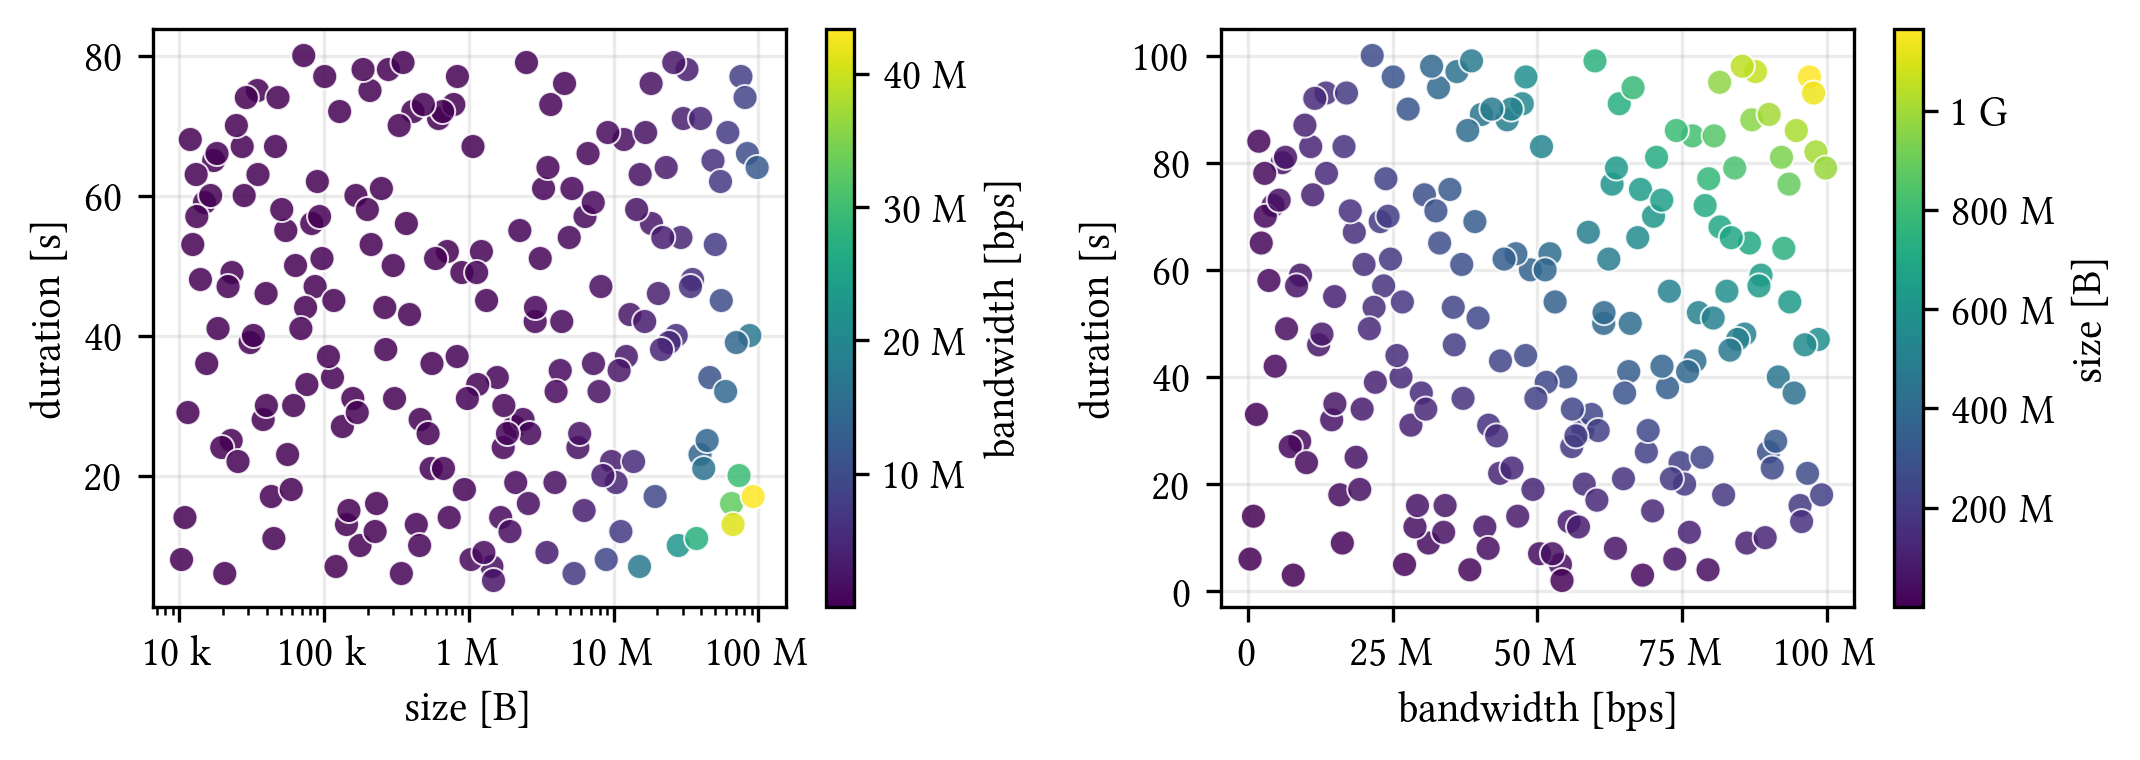

In [5]:
fig, axes = plt.subplots(1, 2, dpi=300, figsize=(8, 2.5))
df = pd.DataFrame(columns=['size', 'duration', 'bandwidth'])

axes[0].set_xscale('log')
plot_search_space(
    fig, axes[0], variables_ranges=[
        (math.log10(10_000), math.log10(100_000_000)), # size
        (5, 80), # duration
    ],
    nb_points=200, labels=['size', 'duration', 'bandwidth'], df=df,
    insert_df_callback=lambda df, x: pd.concat([df, pd.DataFrame([[10 ** x[0], x[1], (10 ** x[0] * 8) / x[1]]], columns=df.columns)], ignore_index=True),
    units=['B', 's', 'bps'],
    generate_points_cb=lhs_callback
)

fig.subplots_adjust(wspace=0.35)  # Adjust space between subplots

df = pd.DataFrame(columns=['bandwidth', 'duration', 'size'])
plot_search_space(
    fig, axes[1], variables_ranges=[
        (1_000, 100_000_000), # bandwidth
        (2, 100), # duration
    ],
    nb_points=200, labels=['bandwidth', 'duration', 'size'], df=df,
    insert_df_callback=lambda df, x: pd.concat([df, pd.DataFrame([[x[0], x[1], (x[0] * x[1]) / 8]], columns=df.columns)], ignore_index=True),
    units=['bps', 's', 'B'], generate_points_cb=lhs_callback
)

/var/folders/ps/jk9b4v4975gbhdfjyh9kkx780000gp/T/ipykernel_47570/1859972533.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  insert_df_callback=lambda df, x: pd.concat([df, pd.DataFrame([[x[0], x[1], (x[0] * x[1]) / 8]], columns=df.columns)], ignore_index=True),


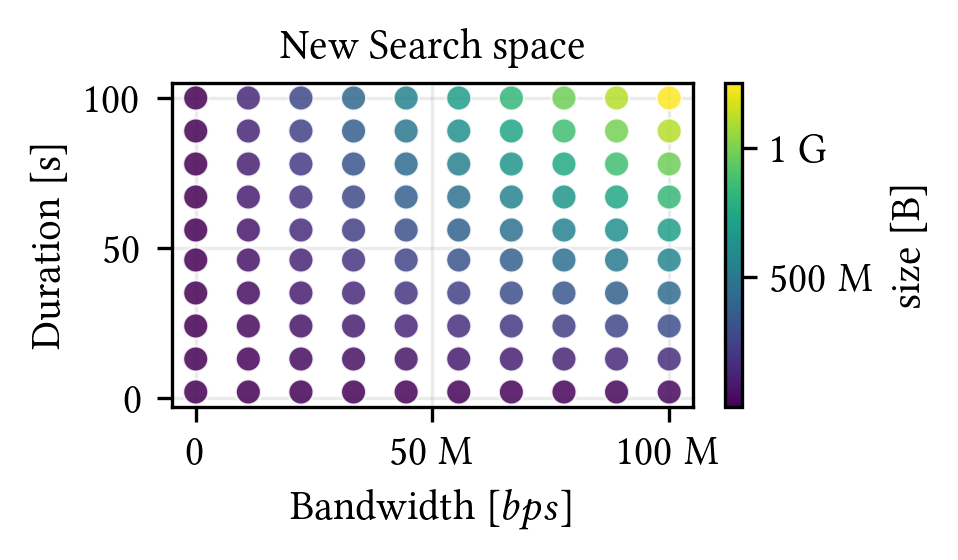

In [6]:
fig, ax = plt.subplots(dpi=300, figsize=(2.8, 1.4))

df = pd.DataFrame(columns=['bandwidth', 'duration', 'size'])

df = plot_search_space(
    fig, ax, variables_ranges=[
        (1_000, 100_000_000), # bandwidth
        (2, 100), # duration
    ],
    nb_points=100, labels=['bandwidth', 'duration', 'size'], df=df,
    insert_df_callback=lambda df, x: pd.concat([df, pd.DataFrame([[x[0], x[1], (x[0] * x[1]) / 8]], columns=df.columns)], ignore_index=True),
    units=['bps', 's', 'B'], generate_points_cb=grid_callback
)

ax.set_title('New Search space')
ax.set_ylabel('Duration [s]')
ax.set_xlabel('Bandwidth [$bps$]')
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(unit=''))
ax.xaxis.set_major_formatter(mpl.ticker.EngFormatter(unit=''))

plt.savefig("new_search_space.pdf", dpi=300, bbox_inches='tight')
plt.show()

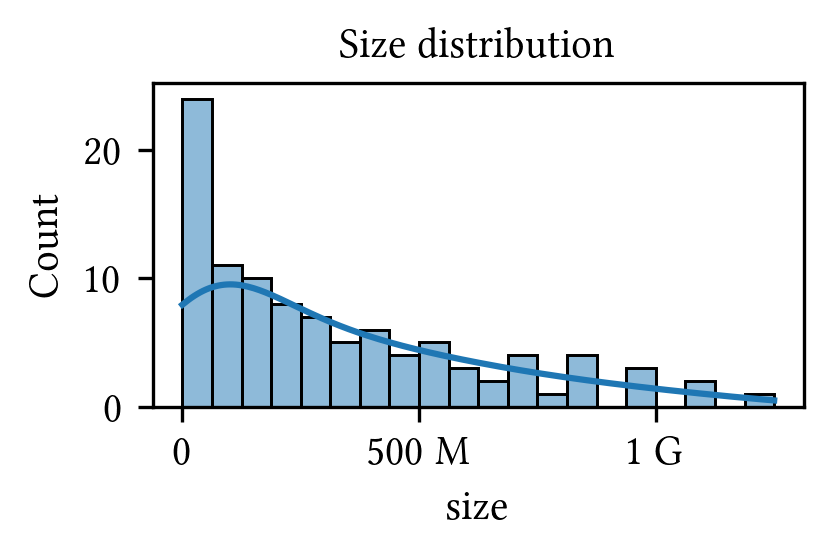

In [7]:
# Plot the distribution of the size
fig, ax = plt.subplots(dpi=300, figsize=(2.8, 1.4))

sns.histplot(
    data=df, x='size', bins=20, ax=ax, kde=True, 
)
ax.set_title('Size distribution')
ax.xaxis.set_major_formatter(mpl.ticker.EngFormatter(unit=''))

/var/folders/ps/jk9b4v4975gbhdfjyh9kkx780000gp/T/ipykernel_47570/3323076575.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  insert_df_callback=lambda df, x: pd.concat([df, pd.DataFrame([[x[0], x[1], (x[1] * 8) / x[0]]], columns=df.columns)], ignore_index=True),


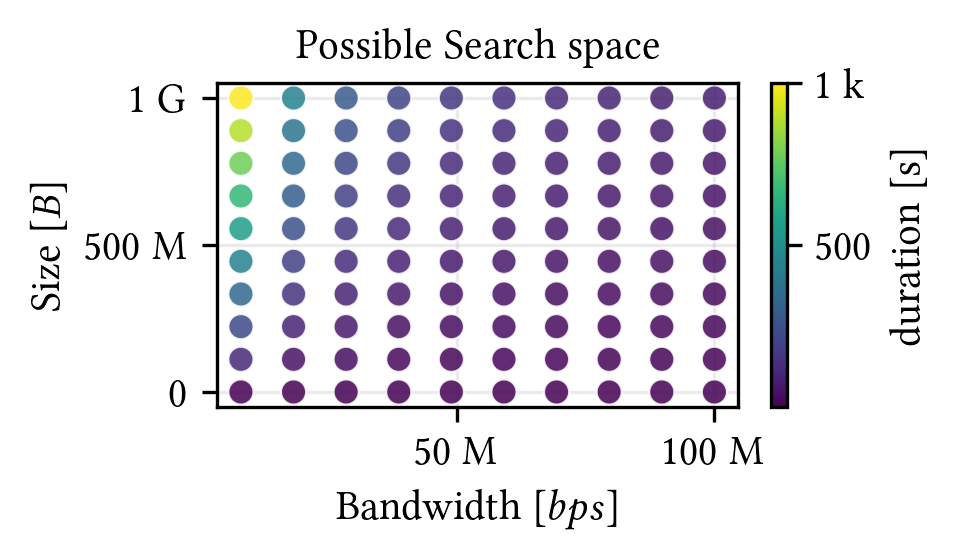

In [8]:
fig, ax = plt.subplots(dpi=300, figsize=(2.8, 1.4))

df = pd.DataFrame(columns=['bandwidth', 'size', 'duration'])

df = plot_search_space(
    fig, ax, variables_ranges=[
        (8_000_000, 100_000_000), # bandwith
        (10_000, 1_000_000_000), # size
    ],
    nb_points=100, labels=['bandwidth', 'size', 'duration'], df=df,
    insert_df_callback=lambda df, x: pd.concat([df, pd.DataFrame([[x[0], x[1], (x[1] * 8) / x[0]]], columns=df.columns)], ignore_index=True),
    units=['bps', 'B', 's'], generate_points_cb=grid_callback
)
ax.set_title('Possible Search space')
ax.set_xlabel('Bandwidth [$bps$]')
ax.set_ylabel('Size [$B$]')

plt.savefig("possible_search_space_size_bandwidth.pdf", dpi=300, bbox_inches='tight')
plt.show()

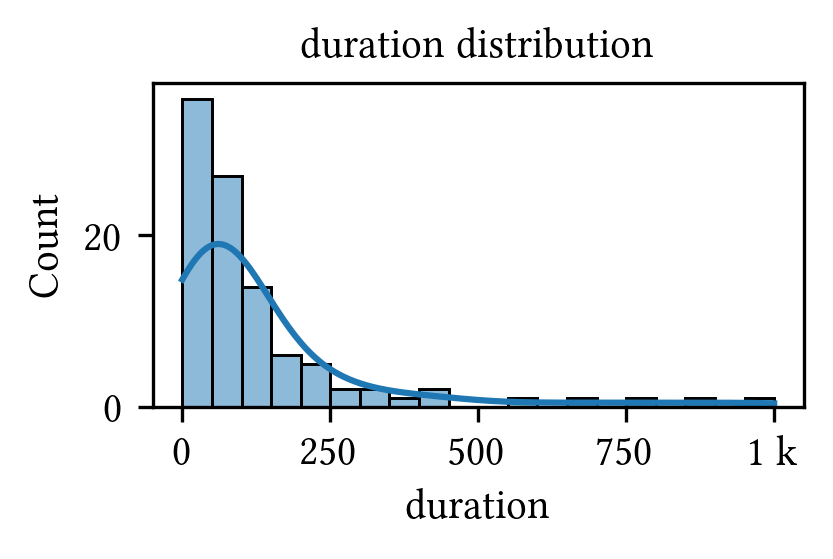

In [9]:
# Plot the distribution of the size
fig, ax = plt.subplots(dpi=300, figsize=(2.8, 1.4))

sns.histplot(
    data=df, x='duration', bins=20, ax=ax, kde=True, 
)
ax.set_title('duration distribution')
ax.xaxis.set_major_formatter(mpl.ticker.EngFormatter(unit=''))

# Real workload

In [99]:
bandwidth_from_mlab = pd.read_csv("../../../mlab_scripts/data.csv")["MeanThroughput"].to_numpy()
transfer_sizes = np.load("../../mobile-datasets/processed_data/packets_size.npy", allow_pickle=True)

In [100]:
def sample_2d_points(x, y, n):
    sampled_x = np.random.choice(x, size=n, replace=True)
    sampled_y = np.random.choice(y, size=n, replace=True)
    return np.column_stack((sampled_x, sampled_y))

In [101]:
sample_exp = sample_2d_points(bandwidth_from_mlab, transfer_sizes, 200)
# Transfer to dataframe
realistic_workload_df = pd.DataFrame(sample_exp, columns=['bandwidth', 'size'])
realistic_workload_df['duration'] = (realistic_workload_df['size'] * 8) / realistic_workload_df['bandwidth']

<Figure size 1920x1440 with 0 Axes>

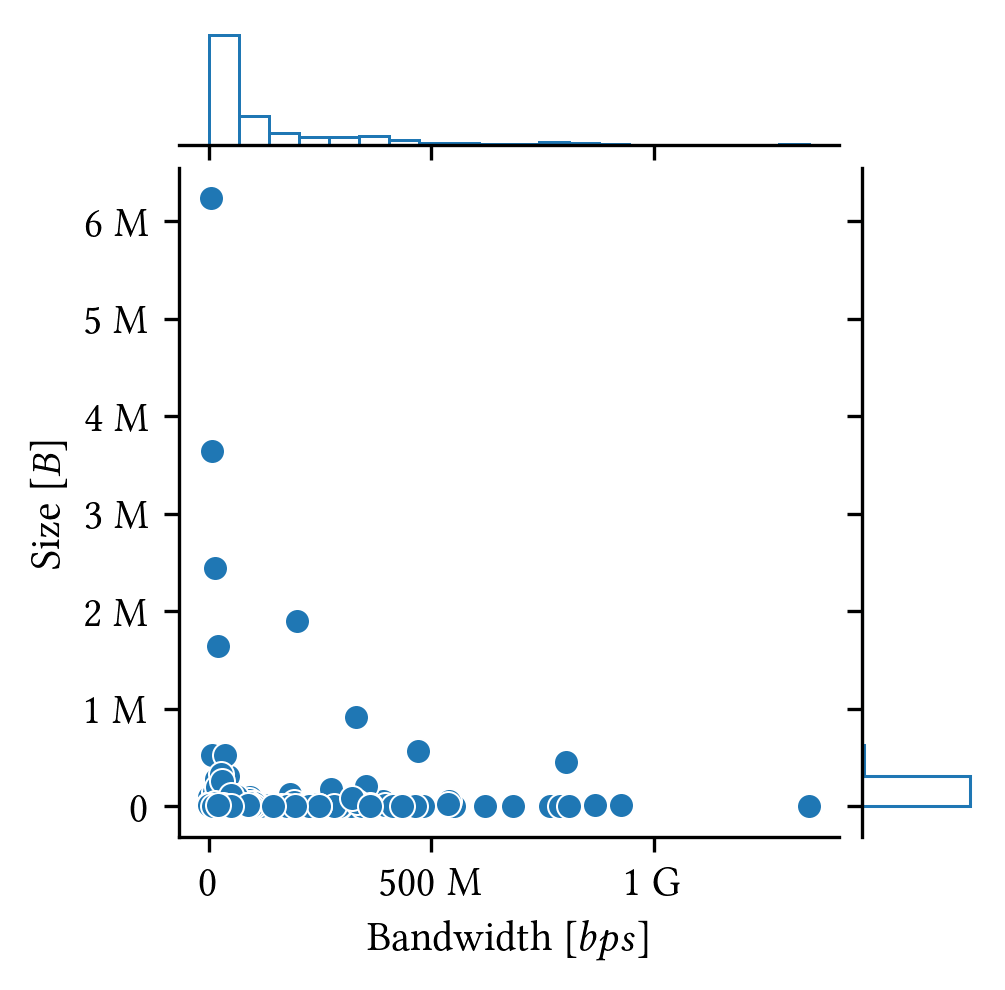

In [102]:
#fig, ax = plt.subplots(dpi=300, figsize=(2.8, 1.4))
plt.figure(dpi=300)
# Ignore hue in jointplot
joint_grid = sns.jointplot(
    data=realistic_workload_df,
    x="bandwidth", y="size",
    height=3.4, marginal_kws=dict(bins=20, fill=False, common_norm=False),
    #marginal_ticks=True,
)
joint_grid.set_axis_labels('Bandwidth [$bps$]', 'Size [$B$]')
joint_grid.ax_joint.xaxis.set_major_formatter(mpl.ticker.EngFormatter(unit=''))
joint_grid.ax_joint.yaxis.set_major_formatter(mpl.ticker.EngFormatter(unit=''))
joint_grid.figure.dpi = 300

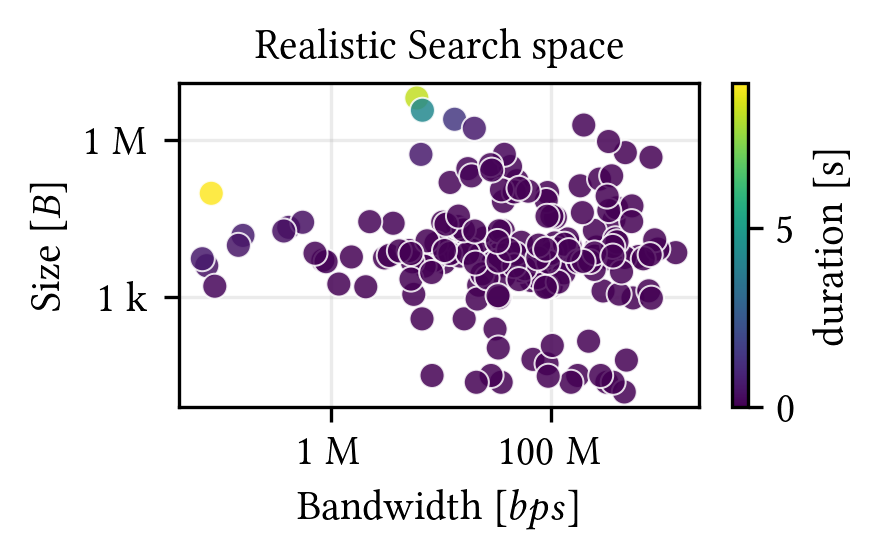

In [108]:
fig, ax = plt.subplots(dpi=300, figsize=(2.8, 1.4))
x_label, y_label, z_label = 'bandwidth', 'size', 'duration'
norm = plt.Normalize(realistic_workload_df[z_label].min(), realistic_workload_df[z_label].max())
p = "viridis"
sns.scatterplot(
    data=realistic_workload_df, 
    x=x_label, y=y_label, hue=z_label, 
    palette=p, legend=False, ax=ax, alpha=0.85, zorder=2
)
sm = plt.cm.ScalarMappable(cmap=p, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label=f"{z_label} [s]")
cbar.ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(unit=''))
ax.set_xlabel(f"Bandwidth [$bps$]")
ax.set_ylabel(f"Size [$B$]")
ax.set_xscale('log')
ax.set_yscale('log')
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(unit=''))
ax.xaxis.set_major_formatter(mpl.ticker.EngFormatter(unit=''))
ax.set_title('Realistic Search space')
ax.grid()
plt.savefig("realistic_search_space.pdf", dpi=300, bbox_inches='tight')